In [1]:
import os
import glob
import torch
import numpy as np

from sklearn import preprocessing
from sklearn import model_selection
from sklearn import metrics

import config
import dataset

import matplotlib.pyplot as plt


In [9]:
image_files =[file_path for file_path in config.DATA_DIR.glob("*.png")] 
#../../../728n8.png => .split("/")[-1] = 728n8.png => 728n8
targets_orig = [str(x).split("/")[-1][:-4] for x in image_files]
#targets = [['p', '5', 'g', '5', 'm'], ['e', '7', '2', 'c', 'd'], ...] 
targets = [[c for c in x] for x in targets_orig]
#flatten the target
targets_flat = [c for c_list in targets for c in c_list]
#print(f"Unique Target Vocab: {np.unique(targets_flat)}")

#Encoding the target
lbl_enc = preprocessing.LabelEncoder()
lbl_enc.fit(targets_flat)

targets_enc = [lbl_enc.transform(x) for x in targets]
targets_enc = np.array(targets_enc) + 1 # since we want 0 for unknowns

# print(targets_enc)
# print(len(lbl_enc.classes_))

train_imgs, test_imgs, train_targets, test_targets, train_orig_targets, test_orig_targets = model_selection.train_test_split(image_files, targets_enc, targets_orig, test_size=0.2, random_state=2022)

train_dataset = dataset.ClassificationDataset(
    image_paths=train_imgs,
    targets=train_targets,
    resize=(config.IMAGE_WIDTH, config.IMAGE_HEIGHT)
)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Label: ['d' '7' 'e' 'n' '3']


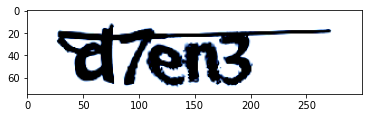

In [20]:
example = train_dataset[2]
npimg = example['image'].numpy() #(3, 75, 300)
target = example['target']-1

plt.imshow(np.transpose(npimg, (1,2,0))); #(75, 300, 3)
print(f"Label: {lbl_enc.inverse_transform(target)}")

